# 911 Calls  Project

The analized data is from 911 calls from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 
The data columns are:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

#### Read the dataframe

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 zipcodes

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique titles:

In [9]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic, we create a new column from this

In [10]:
df['Reason'] = df['title'].apply(lambda x: x.split(sep=':')[0])

The most common Reason for a 911 calls

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

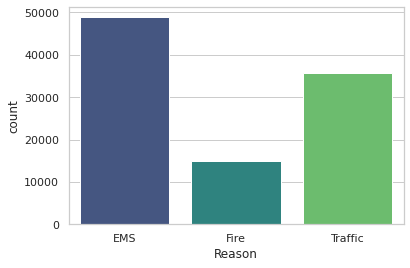

In [12]:
sns.countplot(data=df, x='Reason', palette='viridis')

We convert the timestamp column to DateTime objects

In [13]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x, yearfirst=True))

And grab some of the values from the datetime objects

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

day_of_week is given through a number, we can change that into string fot them to be more recognizable

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of week'] = df['Day of week'].map(dmap)

Number of incidents by Day of Week by reason

In [27]:
df.groupby(['Day of week', 'Reason']).count()['lat']

Day of week  Reason 
Fri          EMS        7315
             Fire       2088
             Traffic    5430
Mon          EMS        7240
             Fire       2204
             Traffic    5236
Sat          EMS        6685
             Fire       2068
             Traffic    4583
Sun          EMS        6456
             Fire       2076
             Traffic    3604
Thu          EMS        6993
             Fire       2136
             Traffic    5349
Tue          EMS        7222
             Fire       2121
             Traffic    5807
Wed          EMS        6966
             Fire       2227
             Traffic    5686
Name: lat, dtype: int64

And the plot

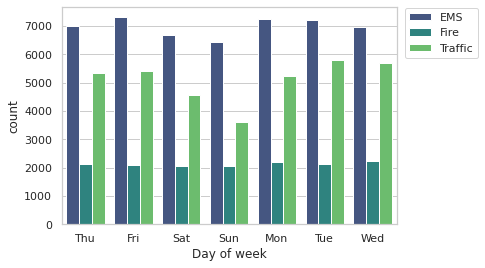

In [325]:
sns.countplot(data=df, x='Day of week', hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.26, 0.88), loc='right')

And by month

In [28]:
df.groupby(['Month', 'Reason']).count()['lat']

Month  Reason 
1      EMS        6063
       Fire       1905
       Traffic    5237
2      EMS        5413
       Fire       1869
       Traffic    4185
3      EMS        5832
       Fire       1590
       Traffic    3679
4      EMS        5680
       Fire       1717
       Traffic    3929
5      EMS        5734
       Fire       1573
       Traffic    4116
6      EMS        5720
       Fire       1796
       Traffic    4270
7      EMS        6029
       Fire       1901
       Traffic    4207
8      EMS        4508
       Fire       1473
       Traffic    3097
12     EMS        3898
       Fire       1096
       Traffic    2975
Name: lat, dtype: int64

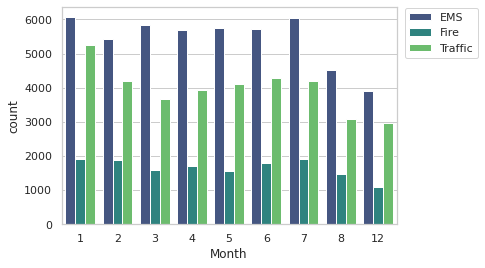

In [326]:
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.26, 0.88), loc='right')

It seems there is no information for November, Octover and September. We can still follow the trend assuming it follows a linear trend

In [34]:
byMonth = df.groupby('Month').count().reset_index()

In [328]:
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


And the plot of the count of calls per month

By a linear model plot we can see a posible trend of the missing data

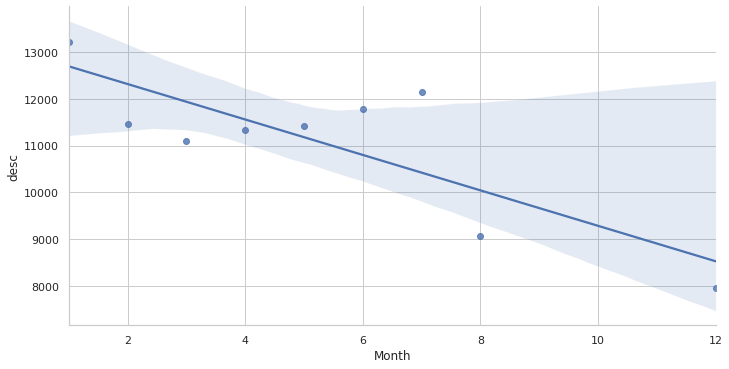

In [36]:
sns.lmplot (data=byMonth, x="Month", y='desc', aspect=2)

Extracting the date from the timestamp

In [29]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

And grouping by Date, and separating by the three reasons

In [30]:
byDate = df.groupby('Date').count().reset_index()

In [31]:
byDate_EMS = df[df['Reason'] == 'EMS'].groupby('Date').count().reset_index()
byDate_Fire = df[df['Reason'] == 'Fire'].groupby('Date').count().reset_index()
byDate_Traffic = df[df['Reason'] == 'Traffic'].groupby('Date').count().reset_index()

Visualizing everything

<AxesSubplot:xlabel='Date', ylabel='lat'>

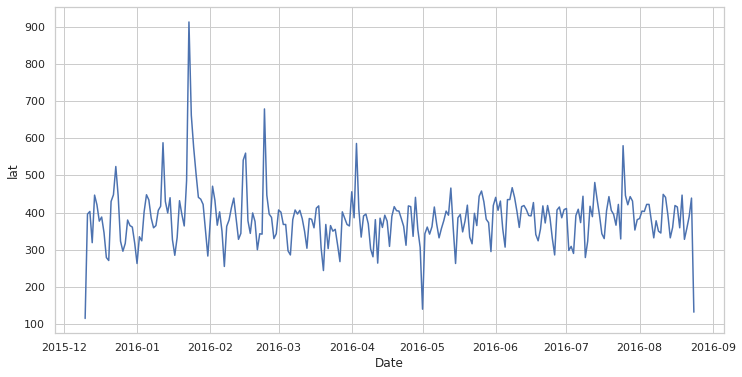

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='lat', data=byDate)

Text(0.5, 1.0, 'EMS')

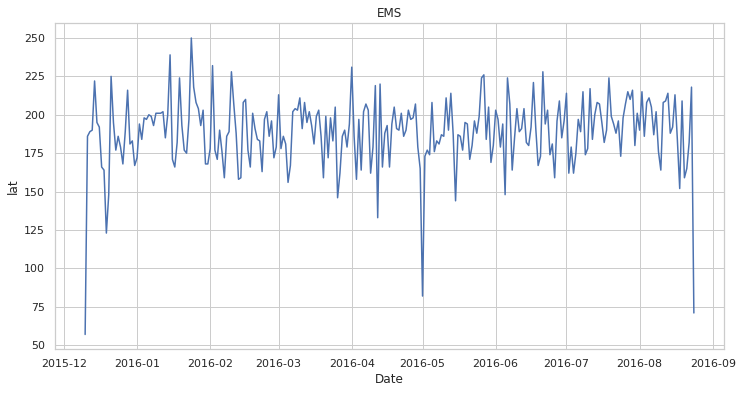

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='lat', data=byDate_EMS)
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

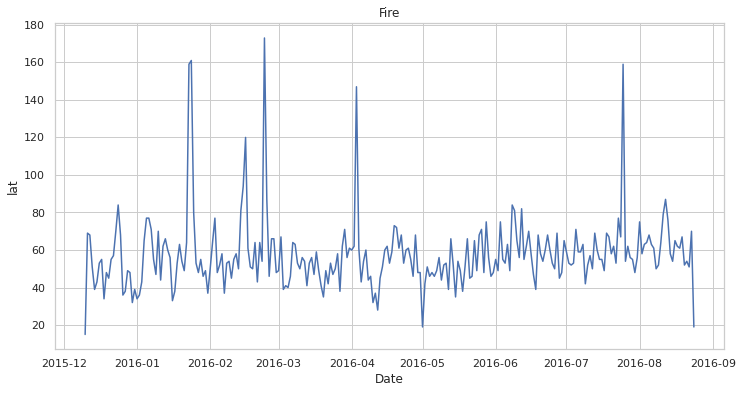

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='lat', data=byDate_Fire)
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

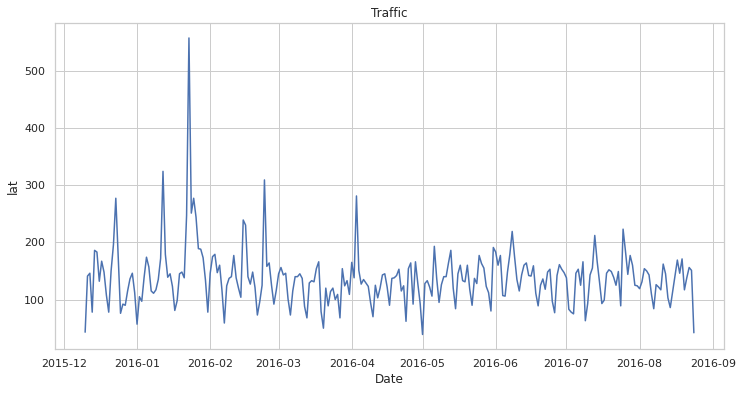

In [39]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Date', y='lat', data=byDate_Traffic)
plt.title('Traffic')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [41]:
byHD=df.groupby(by=['Day of week', 'Hour']).count().unstack()['lat']
byHD.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Creating a HeatMap using with the new dataframe

<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

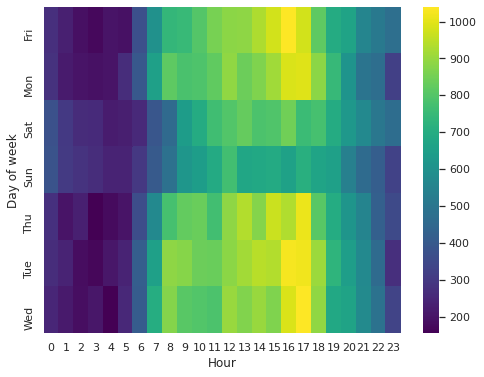

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(data=byHD, cmap='viridis')

and a clustermap

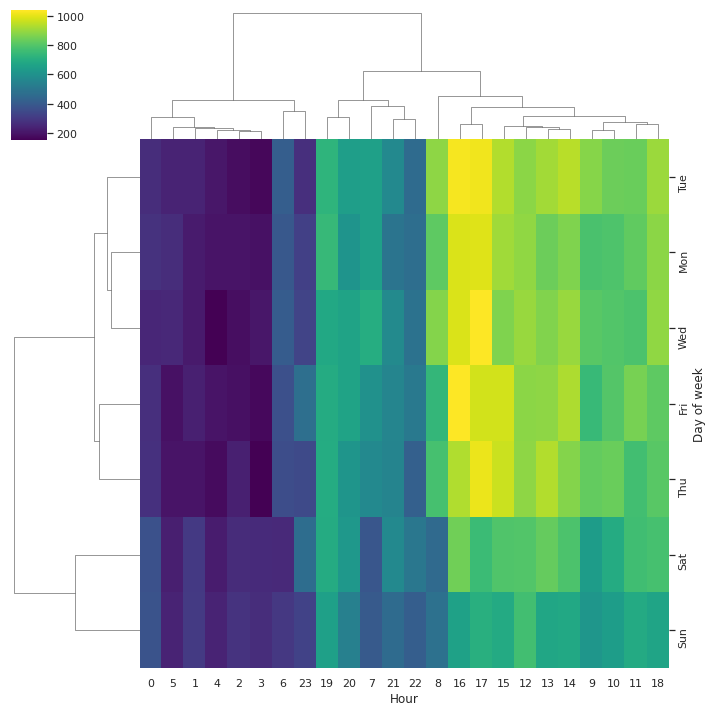

In [341]:
sns.clustermap(data=byHD, cmap='viridis')

We repeat the same, but now by grouping by Month and day of week

In [44]:
byMD=df.groupby(by=['Day of week', 'Month']).count().unstack()['lat']

<AxesSubplot:xlabel='Month', ylabel='Day of week'>

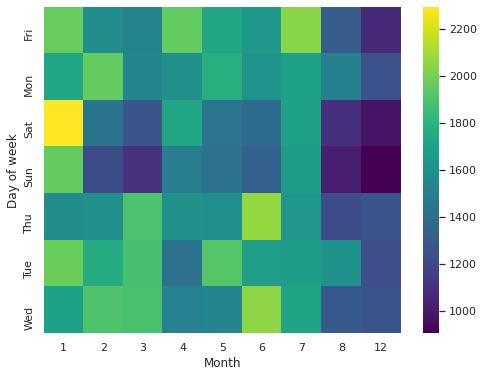

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(data=byMD,cmap='viridis')

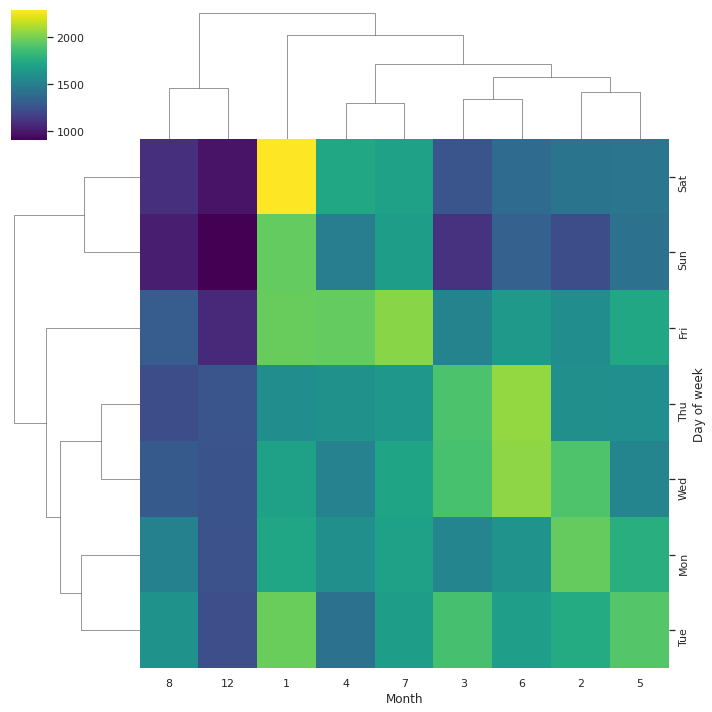

In [344]:
sns.clustermap(data=byMD,cmap='viridis')